## 6. 2K Analysis (90 pts)

In [1]:
%load_ext autoreload
%autoreload 2

from queries import query_mw as q_mw
from queries import query_client as q_client
from queries import query_2k as q_2k

from plots.ctrl import generate, generate_latex, dashboard_time
from plots import tp, rt, table_2k

suite={
    "exp60":"simulation_p2"
}


n_w=8   op_type=get  num_clients=192   mget_size=-


C:\Users\nicok\Miniconda3\envs\asl\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


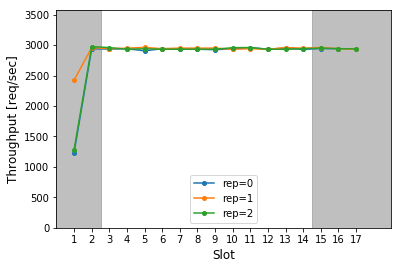

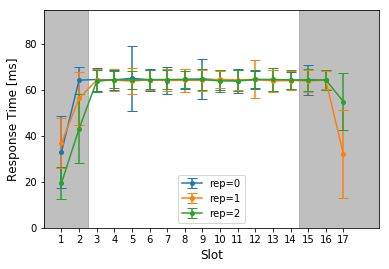

n_w=8   op_type=set  num_clients=192   mget_size=-


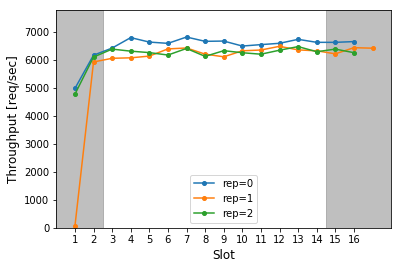

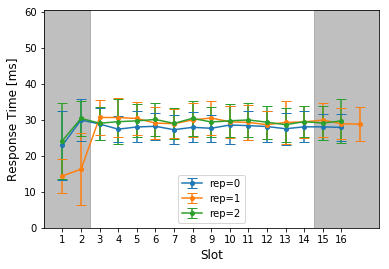

n_w=32   op_type=get  num_clients=192   mget_size=-


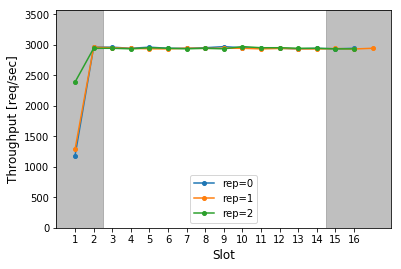

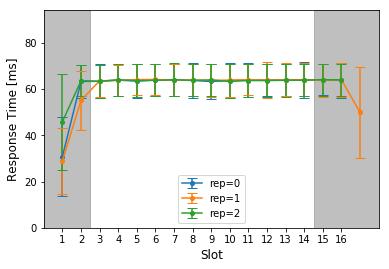

n_w=32   op_type=set  num_clients=192   mget_size=-


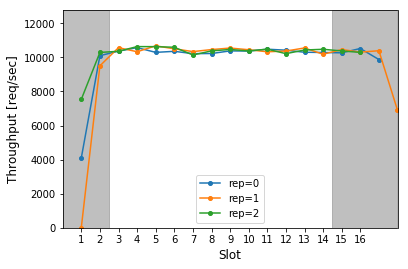

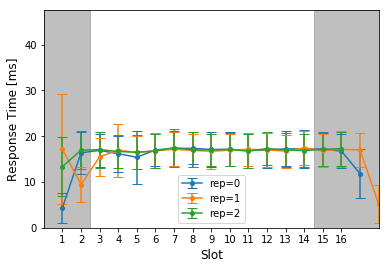

n_w=8   op_type=get  num_clients=192   mget_size=-


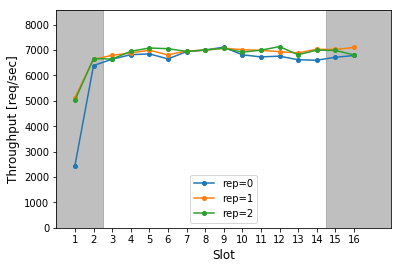

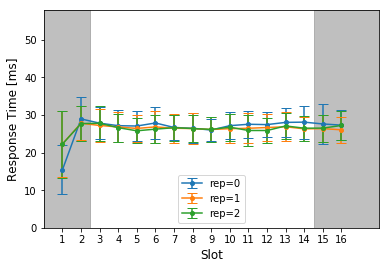

n_w=8   op_type=set  num_clients=192   mget_size=-


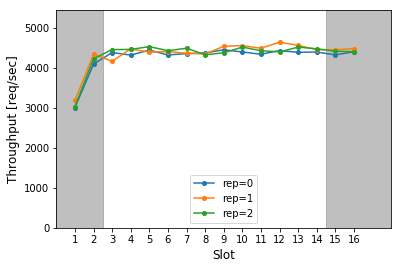

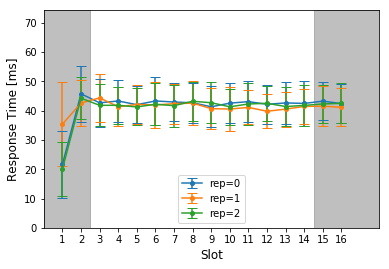

n_w=32   op_type=get  num_clients=192   mget_size=-


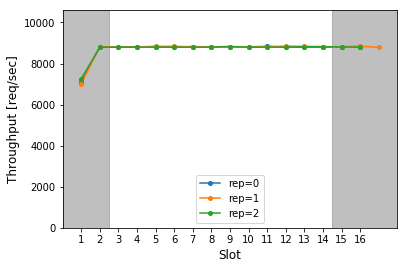

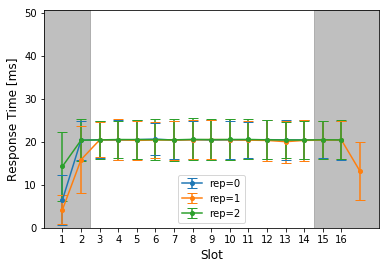

n_w=32   op_type=set  num_clients=192   mget_size=-


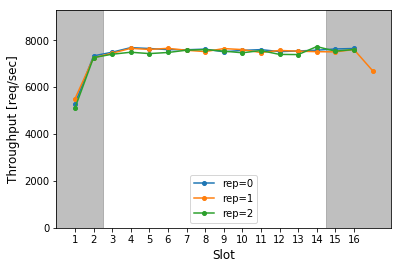

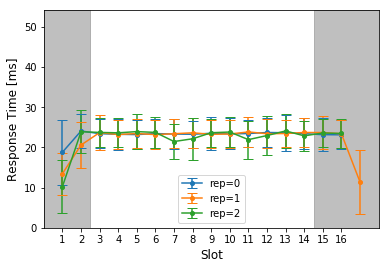

n_w=8   op_type=get  num_clients=192   mget_size=-


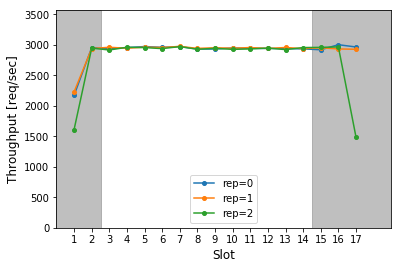

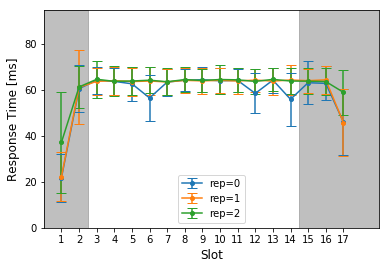

n_w=8   op_type=set  num_clients=192   mget_size=-


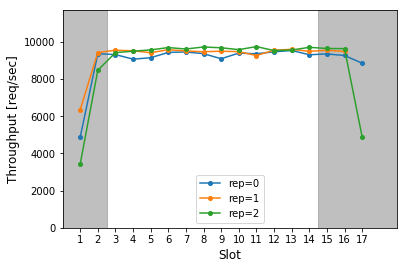

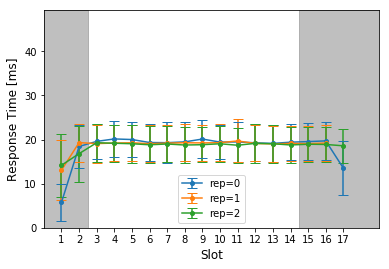

n_w=32   op_type=get  num_clients=192   mget_size=-


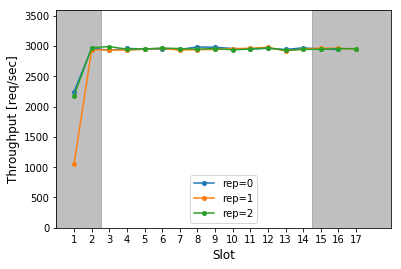

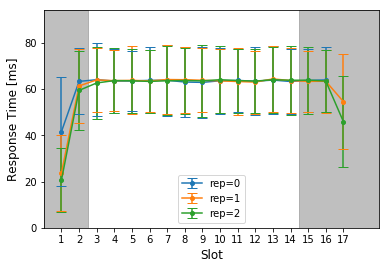

n_w=32   op_type=set  num_clients=192   mget_size=-


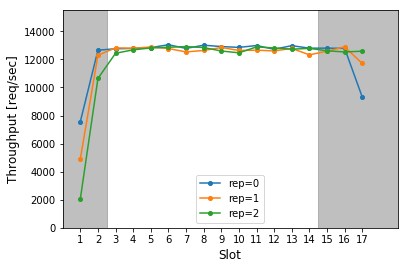

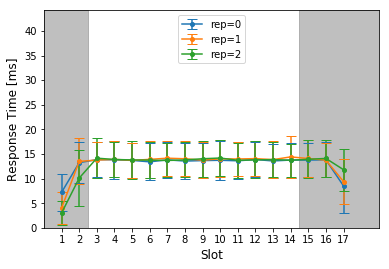

n_w=8   op_type=get  num_clients=192   mget_size=-


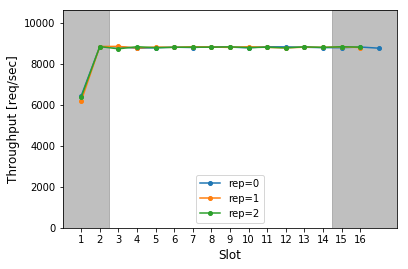

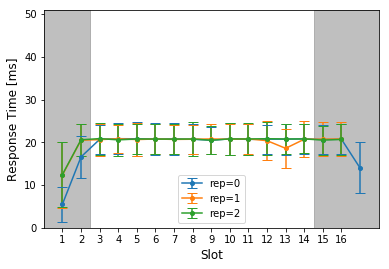

n_w=8   op_type=set  num_clients=192   mget_size=-


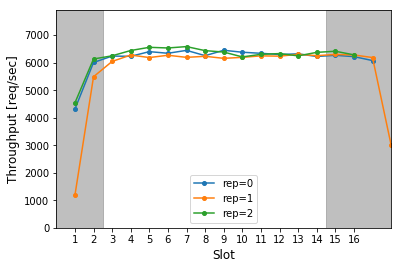

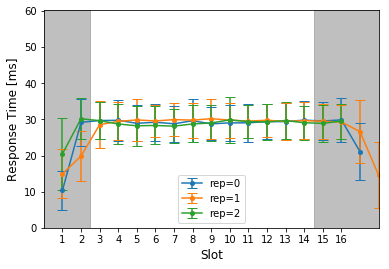

n_w=32   op_type=get  num_clients=192   mget_size=-


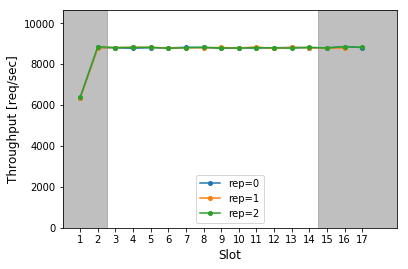

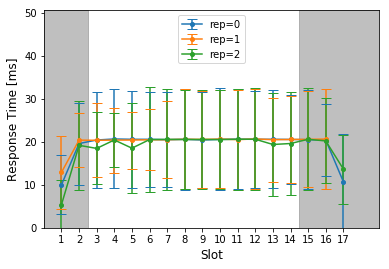

n_w=32   op_type=set  num_clients=192   mget_size=-


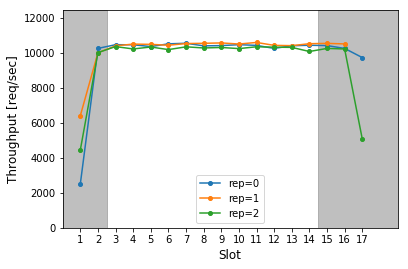

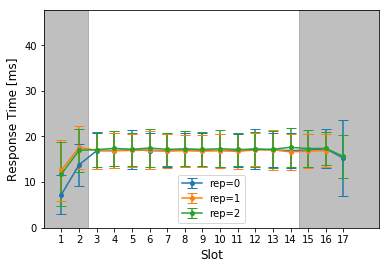

In [2]:
exp_name="exp60"
dashboard_time(suite=suite[exp_name], exp_name=exp_name)

In [3]:
exp_name="exp60"
r_rep = 3

df_exp60_mw = q_mw.load_df(suite=suite[exp_name], exp=exp_name)

factor_map = {
    'n_server_vm':('S', {'1':-1, '3':1}),
    'n_middleware_vm':('M', {'1':-1, '2':1}),
    'n_worker_per_mw':('W', {'8':-1, '32':1})
}

df_exp60_base_mw = q_2k.load_2k_base_df(suite[exp_name], exp_name, r_rep=r_rep, factor_map=factor_map, data_origin='mw')
df_exp60_base_client = q_2k.load_2k_base_df(suite[exp_name], exp_name, r_rep=r_rep, factor_map=factor_map, data_origin='client')

#### Write-Only

In [4]:
print('MW: ')
df_exp60_base_wo_mw = df_exp60_base_mw[df_exp60_base_mw['workload']=='write-only']
display(df_exp60_base_wo_mw)
latex_str = table_2k.base_2k_to_latex(df=df_exp60_base_wo_mw)
generate_latex(latex_str, suite=suite[exp_name], 
                          name=f"{exp_name}_wo_2k_base")


df_exp60_effect_wo_mw, rt_info_exp60_wo_mw, tp_info_exp60_wo_mw = q_2k.load_2k_effect_df(df_exp60_base_wo_mw, r_rep=r_rep, factor_map=factor_map)
print(rt_info_exp60_wo_mw)
print(tp_info_exp60_wo_mw)
display(df_exp60_effect_wo_mw)
latex_str = table_2k.effect_2k_to_latex(df=df_exp60_effect_wo_mw, 
                                          tp_info=tp_info_exp60_wo_mw, 
                                          rt_info=rt_info_exp60_wo_mw)
generate_latex(latex_str, 
                          suite=suite[exp_name], 
                          name=f"{exp_name}_wo_2k_effect")


MW: 


,data_origin,workload,n_server_vm,n_middleware_vm,n_worker_per_mw,I,S,M,W,S-M,S-W,M-W,S-M-W,rt_y1,rt_y2,rt_y3,rt_y_avg,rt_e1,rt_e2,rt_e3,tp_y1,tp_y2,tp_y3,tp_y_avg,tp_e1,tp_e2,tp_e3
10,mw,write-only,1,1,8,1,-1,-1,-1,1,1,1,-1,28.003684,29.696888,29.536880,29.079151,-1.075466,0.617737,0.457729,6619.766667,6257.950000,6284.750000,6387.488889,232.277778,-129.538889,-102.738889
14,mw,write-only,3,1,8,1,1,-1,-1,-1,-1,1,1,42.601181,41.564487,42.001707,42.055791,0.545389,-0.491305,-0.054085,4389.200000,4455.200000,4456.716667,4433.705556,-44.505556,21.494444,23.011111
11,mw,write-only,1,2,8,1,-1,1,-1,-1,1,-1,1,19.551321,19.212689,18.967893,19.243968,0.307354,-0.031279,-0.276075,9328.233333,9492.650000,9609.666667,9476.850000,-148.616667,15.800000,132.816667
15,mw,write-only,3,2,8,1,1,1,-1,1,-1,-1,-1,29.284665,29.629606,29.008279,29.307517,-0.022852,0.322090,-0.299238,6327.166667,6216.133333,6387.733333,6310.344444,16.822222,-94.211111,77.388889
8,mw,write-only,1,1,32,1,-1,-1,1,1,-1,-1,1,16.903213,16.827425,16.962566,16.897734,0.005479,-0.070310,0.064831,10358.650000,10444.700000,10434.250000,10412.533333,-53.883333,32.166667,21.716667
12,mw,write-only,3,1,32,1,1,-1,1,-1,1,-1,-1,23.420101,23.466966,23.166302,23.351123,0.068978,0.115843,-0.184821,7579.316667,7566.133333,7504.750000,7550.066667,29.250000,16.066667,-45.316667
9,mw,write-only,1,2,32,1,-1,1,1,-1,-1,1,-1,13.695076,13.957716,13.861624,13.838139,-0.143063,0.119577,0.023486,12871.866667,12689.700000,12735.300000,12765.622222,106.244444,-75.922222,-30.322222
13,mw,write-only,3,2,32,1,1,1,1,1,1,1,1,16.993128,16.895302,17.278326,17.055585,-0.062457,-0.160283,0.222740,10415.583333,10480.050000,10264.516667,10386.716667,28.866667,93.333333,-122.200000


Using t-value: 1.746
{'NAME': 'response time', 'Y_MEAN_MEAN': 23.853626015344105, 'SSY': 15473.059622309864, 'SST': 1817.1682443922373, 'SSE': 2.8310026993029815, 'STD_DEV_ERROR': 0.42063959479159396, 'STD_DEV_EFFECT': 0.08586269773754016, 'PERCENTAGE_OF_VARIATION_ERROR': 0.15579199713837324}
{'NAME': 'throughput', 'Y_MEAN_MEAN': 8465.415972222221, 'SSY': 1879264140.5141666, 'SST': 159345718.52804404, 'SSE': 189411.1779629622, 'STD_DEV_ERROR': 108.80348626163197, 'STD_DEV_EFFECT': 22.209418631409832, 'PERCENTAGE_OF_VARIATION_ERROR': 0.11886806856980395}


,I_rt,S_rt,M_rt,W_rt,S-M_rt,S-W_rt,M-W_rt,S-M-W_rt,I_tp,S_tp,M_tp,W_tp,S-M_tp,S-W_tp,M-W_tp,S-M-W_tp
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000e+00
total,190.829008,32.711024,-31.938591,-48.543845,-6.149034,-13.369355,13.228324,-0.322851,6.772333e+04,-1.036166e+04,1.015574e+04,1.450655e+04,-729.161111,-121.083333,223.738889,1.696283e+03
effect,23.853626,4.088878,-3.992324,-6.067981,-0.768629,-1.671169,1.653541,-0.040356,8.465416e+03,-1.295208e+03,1.269467e+03,1.813319e+03,-91.145139,-15.135417,27.967361,2.120354e+02
SSj,13655.891378,401.254169,382.527598,883.689326,14.178981,67.027369,65.620711,0.039087,1.719918e+09,4.026151e+07,3.867714e+07,7.891500e+07,199378.472234,5497.940104,18772.158900,1.079016e+06
percentage_of_variation_effect,NaN,22.081289,21.050753,48.630023,0.780279,3.688562,3.611152,0.002151,NaN,2.526676e+01,2.427247e+01,4.952439e+01,0.125123,0.003450,0.011781,6.771543e-01
confidence_interval_low,23.703710,3.938962,-4.142240,-6.217897,-0.918545,-1.821086,1.503624,-0.190273,8.426638e+03,-1.333985e+03,1.230690e+03,1.774541e+03,-129.922784,-53.913062,-10.810284,1.732578e+02
confidence_interval_high,24.003542,4.238794,-3.842408,-5.918064,-0.618713,-1.521253,1.803457,0.109560,8.504194e+03,-1.256430e+03,1.308245e+03,1.852096e+03,-52.367494,23.642228,66.745006,2.508131e+02
significant,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.000000,1.000000e+00


In [5]:
print('Client: ')
df_exp60_base_wo_client = df_exp60_base_client[df_exp60_base_client['workload']=='write-only']
display(df_exp60_base_wo_client)
df_exp60_effect_wo_client, rt_info_exp60_wo_client, tp_info_exp60_wo_client = q_2k.load_2k_effect_df(df_exp60_base_wo_client, r_rep=r_rep, factor_map=factor_map)
print(rt_info_exp60_wo_client)
print(tp_info_exp60_wo_client)
display(df_exp60_effect_wo_client)

Client: 


,data_origin,workload,n_server_vm,n_middleware_vm,n_worker_per_mw,I,S,M,W,S-M,S-W,M-W,S-M-W,rt_y1,rt_y2,rt_y3,rt_y_avg,rt_e1,rt_e2,rt_e3,tp_y1,tp_y2,tp_y3,tp_y_avg,tp_e1,tp_e2,tp_e3
6,client,write-only,1,1,8,1,-1,-1,-1,1,1,1,-1,28.640000,29.443333,30.056667,29.380000,-0.740000,0.063333,0.676667,6703.53,6523.16,6387.14,6537.943333,165.586667,-14.783333,-150.803333
14,client,write-only,3,1,8,1,1,-1,-1,-1,-1,1,1,42.523333,42.070000,41.720000,42.104444,0.418889,-0.034444,-0.384444,4516.34,3062.10,4602.78,4060.406667,455.933333,-998.306667,542.373333
7,client,write-only,1,2,8,1,-1,1,-1,-1,1,-1,1,19.891667,19.841667,19.608333,19.780556,0.111111,0.061111,-0.172222,9647.98,9676.40,9792.51,9705.630000,-57.650000,-29.230000,86.880000
15,client,write-only,3,2,8,1,1,1,-1,1,-1,-1,-1,29.110000,28.883333,29.450000,29.147778,-0.037778,-0.264444,0.302222,6598.35,6660.52,6492.76,6583.876667,14.473333,76.643333,-91.116667
4,client,write-only,1,1,32,1,-1,-1,1,1,-1,-1,1,18.070000,17.670000,18.220000,17.986667,0.083333,-0.316667,0.233333,10626.87,10868.84,10539.00,10678.236667,-51.366667,190.603333,-139.236667
12,client,write-only,3,1,32,1,1,-1,1,-1,1,-1,-1,24.963333,24.103333,24.756667,24.607778,0.355556,-0.504444,0.148889,7692.44,7973.53,7763.80,7809.923333,-117.483333,163.606667,-46.123333
5,client,write-only,1,2,32,1,-1,1,1,-1,-1,1,-1,14.616667,14.815000,14.758333,14.730000,-0.113333,0.085000,0.028333,13139.71,12963.98,13060.84,13054.843333,84.866667,-90.863333,5.996667
13,client,write-only,3,2,32,1,1,1,1,1,1,1,1,17.946667,18.108333,18.451667,18.168889,-0.222222,-0.060556,0.282778,10701.02,10603.00,10405.67,10569.896667,131.123333,33.103333,-164.226667


Using t-value: 1.746
{'NAME': 'response time', 'Y_MEAN_MEAN': 24.48826388888889, 'SSY': 16061.189875, 'SST': 1668.9882359953704, 'SSE': 2.2609814814814775, 'STD_DEV_ERROR': 0.3759140095721259, 'STD_DEV_EFFECT': 0.07673312588461832, 'PERCENTAGE_OF_VARIATION_ERROR': 0.13547018683046905}
{'NAME': 'throughput', 'Y_MEAN_MEAN': 8625.094583333332, 'SSY': 1963585702.5275002, 'SST': 178171544.81279582, 'SSE': 1736957.2140666668, 'STD_DEV_ERROR': 329.4841815310208, 'STD_DEV_EFFECT': 67.25567692246219, 'PERCENTAGE_OF_VARIATION_ERROR': 0.9748791345395142}


,I_rt,S_rt,M_rt,W_rt,S-M_rt,S-W_rt,M-W_rt,S-M-W_rt,I_tp,S_tp,M_tp,W_tp,S-M_tp,S-W_tp,M-W_tp,S-M-W_tp
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000
total,195.906111,32.151667,-32.251667,-44.919444,-6.539444,-12.031667,12.860556,0.175000,6.900076e+04,-1.095255e+04,1.082774e+04,1.522504e+04,-260.850000,246.030000,-554.576667,1027.583333
effect,24.488264,4.018958,-4.031458,-5.614931,-0.817431,-1.503958,1.607569,0.021875,8.625095e+03,-1.369069e+03,1.353467e+03,1.903130e+03,-32.606250,30.753750,-69.322083,128.447917
SSj,14392.201639,387.648626,390.063751,756.658683,16.036625,54.285376,62.022708,0.011484,1.785414e+09,4.498438e+07,4.396496e+07,8.692573e+07,25516.020937,22699.035337,115333.229704,395972.815104
percentage_of_variation_effect,NaN,23.226564,23.371270,45.336370,0.960859,3.252592,3.716186,0.000688,NaN,2.524779e+01,2.467563e+01,4.878766e+01,0.014321,0.012740,0.064732,0.222242
confidence_interval_low,24.354288,3.884982,-4.165434,-5.748907,-0.951407,-1.637934,1.473593,-0.112101,8.507666e+03,-1.486497e+03,1.236039e+03,1.785702e+03,-150.034662,-86.674662,-186.750495,11.019505
confidence_interval_high,24.622240,4.152934,-3.897482,-5.480955,-0.683455,-1.369982,1.741545,0.155851,8.742523e+03,-1.251640e+03,1.470895e+03,2.020559e+03,84.822162,148.182162,48.106329,245.876329
significant,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,1.000000


#### Read-Only

In [6]:
print('MW: ')
df_exp60_base_ro_mw = df_exp60_base_mw[df_exp60_base_mw['workload']=='read-only']
display(df_exp60_base_ro_mw)
latex_str = table_2k.base_2k_to_latex(df=df_exp60_base_ro_mw)
generate_latex(latex_str, 
                          suite=suite[exp_name], 
                          name=f"{exp_name}_ro_2k_base")


df_exp60_effect_ro_mw, rt_info_exp60_ro_mw, tp_info_exp60_ro_mw = q_2k.load_2k_effect_df(df_exp60_base_ro_mw, r_rep=r_rep, factor_map=factor_map)
print(rt_info_exp60_ro_mw)
print(tp_info_exp60_ro_mw)
display(df_exp60_effect_ro_mw)
latex_str = table_2k.effect_2k_to_latex(df=df_exp60_effect_ro_mw, 
                                          tp_info=tp_info_exp60_ro_mw, 
                                          rt_info=rt_info_exp60_ro_mw)
generate_latex(latex_str, suite=suite[exp_name], 
                          name=f"{exp_name}_ro_2k_effect")

MW: 


,data_origin,workload,n_server_vm,n_middleware_vm,n_worker_per_mw,I,S,M,W,S-M,S-W,M-W,S-M-W,rt_y1,rt_y2,rt_y3,rt_y_avg,rt_e1,rt_e2,rt_e3,tp_y1,tp_y2,tp_y3,tp_y_avg,tp_e1,tp_e2,tp_e3
2,mw,read-only,1,1,8,1,-1,-1,-1,1,1,1,-1,64.292392,64.094457,64.201461,64.196103,0.096289,-0.101646,0.005357,2936.583333,2947.200000,2940.783333,2941.522222,-4.938889,5.677778,-0.738889
6,mw,read-only,3,1,8,1,1,-1,-1,-1,-1,1,1,27.253603,26.559439,26.454509,26.755850,0.497752,-0.196411,-0.301341,6792.750000,6946.216667,6966.083333,6901.683333,-108.933333,44.533333,64.400000
3,mw,read-only,1,2,8,1,-1,1,-1,-1,1,-1,1,62.177695,63.965301,64.159351,63.434115,-1.256421,0.531185,0.725235,2946.083333,2951.550000,2940.583333,2946.072222,0.011111,5.477778,-5.488889
7,mw,read-only,3,2,8,1,1,1,-1,1,-1,-1,-1,20.738818,20.517419,20.742992,20.666410,0.072409,-0.148991,0.076582,8804.916667,8809.766667,8800.850000,8805.177778,-0.261111,4.588889,-4.327778
0,mw,read-only,1,1,32,1,-1,-1,1,1,-1,-1,1,63.759307,63.944107,63.753600,63.819005,-0.059697,0.125102,-0.065404,2947.766667,2938.216667,2944.100000,2943.361111,4.405556,-5.144444,0.738889
4,mw,read-only,3,1,32,1,1,-1,1,-1,1,-1,-1,20.461122,20.378690,20.489713,20.443175,0.017947,-0.064485,0.046538,8810.450000,8818.750000,8802.466667,8810.555556,-0.105556,8.194444,-8.088889
1,mw,read-only,1,2,32,1,-1,1,1,-1,-1,1,-1,63.556464,63.753025,63.608075,63.639188,-0.082724,0.113837,-0.031113,2954.783333,2944.350000,2952.083333,2950.405556,4.377778,-6.055556,1.677778
5,mw,read-only,3,2,32,1,1,1,1,1,1,1,1,20.570511,20.528768,20.041187,20.380156,0.190356,0.148613,-0.338968,8798.250000,8807.066667,8801.300000,8802.205556,-3.955556,4.861111,-0.905556


Using t-value: 1.746
{'NAME': 'response time', 'Y_MEAN_MEAN': 42.91675027021729, 'SSY': 54735.306277426374, 'SST': 10530.96738727767, 'SSE': 3.040925785425124, 'STD_DEV_ERROR': 0.4359562610963057, 'STD_DEV_EFFECT': 0.08898919915479217, 'PERCENTAGE_OF_VARIATION_ERROR': 0.02887603459012539}
{'NAME': 'throughput', 'Y_MEAN_MEAN': 5637.622916666667, 'SSY': 944926219.3713889, 'SST': 182139207.7587847, 'SSE': 18431.971296296284, 'STD_DEV_ERROR': 33.94109906910084, 'STD_DEV_EFFECT': 6.928197835712515, 'PERCENTAGE_OF_VARIATION_ERROR': 0.010119716409827909}


,I_rt,S_rt,M_rt,W_rt,S-M_rt,S-W_rt,M-W_rt,S-M-W_rt,I_tp,S_tp,M_tp,W_tp,S-M_tp,S-W_tp,M-W_tp,S-M-W_tp
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
total,343.334002,-166.842821,-7.094265,-6.770956,-5.210655,-6.426903,6.608593,5.444251,4.510098e+04,2.153826e+04,1.906739e+03,1.912072e+03,1.883550e+03,1.899728e+03,-1.909350e+03,-1.914339e+03
effect,42.916750,-20.855353,-0.886783,-0.846369,-0.651332,-0.803363,0.826074,0.680531,5.637623e+03,2.692283e+03,2.383424e+02,2.390090e+02,2.354438e+02,2.374660e+02,-2.386687e+02,-2.392924e+02
SSj,44204.338890,10438.697533,18.873223,17.192190,10.181599,15.489406,16.377561,11.114949,7.627870e+08,1.739613e+08,1.363370e+06,1.371008e+06,1.330410e+06,1.353362e+06,1.367107e+06,1.374260e+06
percentage_of_variation_effect,NaN,99.123824,0.179216,0.163254,0.096682,0.147084,0.155518,0.105545,NaN,9.551006e+01,7.485318e-01,7.527251e-01,7.304359e-01,7.430372e-01,7.505833e-01,7.545108e-01
confidence_interval_low,42.761375,-21.010728,-1.042158,-1.001745,-0.806707,-0.958738,0.670699,0.525156,5.625526e+03,2.680186e+03,2.262457e+02,2.269124e+02,2.233471e+02,2.253693e+02,-2.507654e+02,-2.513890e+02
confidence_interval_high,43.072125,-20.699977,-0.731408,-0.690994,-0.495957,-0.647988,0.981449,0.835906,5.649720e+03,2.704379e+03,2.504390e+02,2.511057e+02,2.475404e+02,2.495626e+02,-2.265721e+02,-2.271957e+02
significant,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
print('Client: ')
df_exp60_base_ro_client = df_exp60_base_client[df_exp60_base_client['workload']=='read-only']
display(df_exp60_base_ro_client)
df_exp60_effect_ro_client, rt_info_exp60_ro_client, tp_info_exp60_ro_client = q_2k.load_2k_effect_df(df_exp60_base_ro_client, r_rep=r_rep, factor_map=factor_map)
print(rt_info_exp60_ro_client)
print(tp_info_exp60_ro_client)
display(df_exp60_effect_ro_client)

Client: 


,data_origin,workload,n_server_vm,n_middleware_vm,n_worker_per_mw,I,S,M,W,S-M,S-W,M-W,S-M-W,rt_y1,rt_y2,rt_y3,rt_y_avg,rt_e1,rt_e2,rt_e3,tp_y1,tp_y2,tp_y3,tp_y_avg,tp_e1,tp_e2,tp_e3
2,client,read-only,1,1,8,1,-1,-1,-1,1,1,1,-1,63.866667,60.836667,60.743333,61.815556,2.051111,-0.978889,-1.072222,3006.11,3160.64,3176.42,3114.390000,-108.280000,46.250000,62.030000
10,client,read-only,3,1,8,1,1,-1,-1,-1,-1,1,1,27.836667,27.203333,27.266667,27.435556,0.401111,-0.232222,-0.168889,6895.98,7056.49,7040.11,6997.526667,-101.546667,58.963333,42.583333
3,client,read-only,1,2,8,1,-1,1,-1,-1,1,-1,1,61.771667,61.701667,63.290000,62.254444,-0.482778,-0.552778,1.035556,3119.04,3113.71,3054.05,3095.600000,23.440000,18.110000,-41.550000
11,client,read-only,3,2,8,1,1,1,-1,1,-1,-1,-1,20.225000,21.191667,21.168333,20.861667,-0.636667,0.330000,0.306667,9500.21,9061.82,9069.96,9210.663333,289.546667,-148.843333,-140.703333
0,client,read-only,1,1,32,1,-1,-1,1,1,-1,-1,1,63.720000,62.280000,63.703333,63.234444,0.485556,-0.954444,0.468889,3002.46,3099.66,3027.73,3043.283333,-40.823333,56.376667,-15.553333
8,client,read-only,3,1,32,1,1,-1,1,-1,1,-1,-1,20.790000,20.306667,21.296667,20.797778,-0.007778,-0.491111,0.498889,9235.54,9461.52,9016.19,9237.750000,-2.210000,223.770000,-221.560000
1,client,read-only,1,2,32,1,-1,1,1,-1,-1,1,-1,63.186667,63.375000,61.606667,62.722778,0.463889,0.652222,-1.116111,3027.43,3033.07,3125.66,3062.053333,-34.623333,-28.983333,63.606667
9,client,read-only,3,2,32,1,1,1,1,1,1,1,1,20.760000,21.235000,20.703333,20.899444,-0.139444,0.335556,-0.196111,9266.41,9045.37,9282.95,9198.243333,68.166667,-152.873333,84.706667


Using t-value: 1.746
{'NAME': 'response time', 'Y_MEAN_MEAN': 42.50270833333333, 'SSY': 53073.01238611111, 'SST': 9717.487210069445, 'SSE': 12.691101851851883, 'STD_DEV_ERROR': 0.8906143192991806, 'STD_DEV_EFFECT': 0.18179588665826377, 'PERCENTAGE_OF_VARIATION_ERROR': 0.1306006540322597}
{'NAME': 'throughput', 'Y_MEAN_MEAN': 5869.93875, 'SSY': 1025303173.6281002, 'SST': 198354831.33806252, 'SSE': 307236.2251333338, 'STD_DEV_ERROR': 138.57223412658598, 'STD_DEV_EFFECT': 28.285938843968456, 'PERCENTAGE_OF_VARIATION_ERROR': 0.15489223179530287}


,I_rt,S_rt,M_rt,W_rt,S-M_rt,S-W_rt,M-W_rt,S-M-W_rt,I_tp,S_tp,M_tp,W_tp,S-M_tp,S-W_tp,M-W_tp,S-M-W_tp
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
total,340.021667,-160.032778,-6.545000,-4.712778,-6.399444,-8.487222,5.725000,7.626111,4.695951e+04,2.232886e+04,2.173610e+03,2.123150e+03,2.173650e+03,2.332457e+03,-2.215083e+03,-2.290203e+03
effect,42.502708,-20.004097,-0.818125,-0.589097,-0.799931,-1.060903,0.715625,0.953264,5.869939e+03,2.791107e+03,2.717012e+02,2.653938e+02,2.717062e+02,2.915571e+02,-2.768854e+02,-2.862754e+02
SSj,43355.525176,9603.933736,16.063884,8.328853,15.357333,27.012353,12.290859,21.809089,8.269483e+08,1.869667e+08,1.771718e+06,1.690412e+06,1.771783e+06,2.040133e+06,1.839973e+06,1.966887e+06
percentage_of_variation_effect,NaN,98.831452,0.165309,0.085710,0.158038,0.277977,0.126482,0.224431,NaN,9.425870e+01,8.932062e-01,8.522163e-01,8.932391e-01,1.028527e+00,9.276168e-01,9.916001e-01
confidence_interval_low,42.185293,-20.321513,-1.135541,-0.906513,-1.117346,-1.378318,0.398209,0.635848,5.820552e+03,2.741720e+03,2.223140e+02,2.160065e+02,2.223190e+02,2.421698e+02,-3.262727e+02,-3.356627e+02
confidence_interval_high,42.820124,-19.686682,-0.500709,-0.271682,-0.482515,-0.743487,1.033041,1.270680,5.919326e+03,2.840494e+03,3.210885e+02,3.147810e+02,3.210935e+02,3.409443e+02,-2.274982e+02,-2.368882e+02
significant,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
